# Import field data points

In [56]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon
import seaborn as sn
import numpy as np
# Raster packages loading
import rasterio
import matplotlib.pyplot as plt
import rasterstats
from rasterio.plot import show, plotting_extent

### 1.1 Load AGC-data from csv

In a first step we'll load the CSV data and check some basic data stuff.

### Data bekijken

In [6]:
data = pd.read_csv("F:/Users/jfeyen/Varia/Suriname/Biomass_2021/Biomass_2021/datAGC.csv")

In [8]:
# Visualize the data, what are the Columns + datatypes of the columns?
data['MAP'].astype(str)

0       14
1        7
2       14
3       15
4       14
        ..
3756    18
3757    15
3758    13
3759    13
3760    13
Name: MAP, Length: 3761, dtype: object

In [9]:
# Check the Scientific names
data.dtypes

X                    int64
SCIENTIFIC_NAME     object
DATE                object
SU                   int64
PSP                  int64
LOCATION            object
MAP                  int64
TREE_NO             object
VERNACULAR_NAME     object
FAMILY              object
coor_x              object
coor_y             float64
dbh                float64
pom                float64
TH_M               float64
CH_M               float64
DECAY              float64
QUALITY            float64
O_order            float64
FAM                 object
GEN                 object
SP                  object
ScN                 object
T_tree              object
meanWD             float64
E                  float64
B_14               float64
diam.class          object
AGB                float64
AGB_Mg             float64
AGClow             float64
AGChigh            float64
dtype: object

Nieuwe variabele aanmaken met uniek ID per plot, volgens: "SU_PLOT"

In [10]:
data.loc[(data['dbh']>0)&(data['dbh']<10),'diam.class']='c_5-10'
data.loc[(data['dbh']>=10)&(data['dbh']<20),'diam.class']='c_10-20'
data.loc[(data['dbh']>=20)&(data['dbh']<30),'diam.class']='c_20-30'
data.loc[(data['dbh']>=30)&(data['dbh']<40),'diam.class']='c_30-40'
data[data['SU']==8]

,X,SCIENTIFIC_NAME,DATE,SU,PSP,LOCATION,MAP,TREE_NO,VERNACULAR_NAME,FAMILY,...,ScN,T_tree,meanWD,E,B_14,diam.class,AGB,AGB_Mg,AGClow,AGChigh
3623,3831,Avicennia germinans,8/29/2019,8,1,Saramacca,1,NaN,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_20-30,271.974810,0.271975,0.125108,0.062554
3624,3832,Avicennia germinans,8/29/2019,8,1,Saramacca,1,118b,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_10-20,59.326561,0.059327,0.027290,0.013645
3625,3833,Avicennia germinans,8/29/2019,8,1,Saramacca,1,118a,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_20-30,218.030597,0.218031,0.100294,0.050147
3626,3835,Avicennia germinans,8/29/2019,8,1,Saramacca,1,64,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_30-40,500.681726,0.500682,0.230314,0.115157
3627,3840,Avicennia germinans,8/29/2019,8,1,Saramacca,5,62,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_30-40,583.409054,0.583409,0.268368,0.134184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,4044,Avicennia germinans,8/30/2019,8,4,Saramacca,18,285,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_5-10,89.864418,0.089864,0.041338,0.020669
3757,4046,Avicennia germinans,8/30/2019,8,4,Saramacca,15,288,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_10-20,138.440728,0.138441,0.063683,0.031841
3758,4047,Avicennia germinans,8/30/2019,8,4,Saramacca,13,289,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_10-20,86.121581,0.086122,0.039616,0.019808
3759,4048,Avicennia germinans,8/30/2019,8,4,Saramacca,13,290,Parwa,Acanthaceae,...,Avicennia germinans,mangrove,NaN,NaN,NaN,c_10-20,53.387642,0.053388,0.024558,0.012279


In [11]:
#Enkel data >10cm
data2= data[data['dbh']>=10].reindex()
#data2

In [12]:
#data.loc[data['diam.class']=='c_5-10', 'AGB']

In [13]:
#Optie 2 - Data tussen 5-10cm (4/20 MAP's): *5 om te extrapoleren over volledig PSP #LETTEN OP BAP_SIZE
#data[data['diam.class']=='c_5-10']= data[data['diam.class']=='c_5-10']*5
#data.loc[data['diam.class']=='c_5-10', 'AGB'] = data.loc[data['diam.class']=='c_5-10', 'AGB']*5

In [30]:
data['id_plot']= data[['SU','PSP']].astype(str).agg('_'.join, axis=1)
data=data

In [31]:
data

,X,SCIENTIFIC_NAME,DATE,SU,PSP,LOCATION,MAP,TREE_NO,VERNACULAR_NAME,FAMILY,...,meanWD,E,B_14,diam.class,AGB,AGB_Mg,AGClow,AGChigh,BAP,id_plot
0,1,Avicennia germinans,07/07/2019,15,3,Marowijne,14,NaN,Parwa,Acanthaceae,...,0.7764,0.046146,0.121672,c_10-20,39.428052,0.039428,0.018137,0.009068,4,15_3
1,2,Avicennia germinans,NaN,1,4,Nickerie,7,36,Parwa,Acanthaceae,...,0.7764,0.120260,0.128573,c_10-20,88.652225,0.088652,0.040780,0.020390,2,1_4
2,3,Avicennia germinans,NaN,1,3,Nickerie,14,169,Parwa,Acanthaceae,...,0.7764,0.120260,0.048218,c_10-20,35.115912,0.035116,0.016153,0.008077,4,1_3
3,4,Avicennia germinans,NaN,5,2,Coronie,15,162,Parwa,Acanthaceae,...,0.7764,0.085706,0.114892,c_10-20,77.511039,0.077511,0.035655,0.017828,4,5_2
4,5,Avicennia germinans,NaN,1,2,Nickerie,14,190,Parwa,Acanthaceae,...,0.7764,0.120260,0.168424,c_10-20,113.599988,0.113600,0.052256,0.026128,4,1_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,4044,Avicennia germinans,8/30/2019,8,4,Saramacca,18,285,Parwa,Acanthaceae,...,NaN,NaN,NaN,c_5-10,89.864418,0.089864,0.041338,0.020669,5,8_4
3757,4046,Avicennia germinans,8/30/2019,8,4,Saramacca,15,288,Parwa,Acanthaceae,...,NaN,NaN,NaN,c_10-20,138.440728,0.138441,0.063683,0.031841,4,8_4
3758,4047,Avicennia germinans,8/30/2019,8,4,Saramacca,13,289,Parwa,Acanthaceae,...,NaN,NaN,NaN,c_10-20,86.121581,0.086122,0.039616,0.019808,4,8_4
3759,4048,Avicennia germinans,8/30/2019,8,4,Saramacca,13,290,Parwa,Acanthaceae,...,NaN,NaN,NaN,c_10-20,53.387642,0.053388,0.024558,0.012279,4,8_4


Nu ook unieke ID voor elke MAP aanmaken, volgens "SU_PLOT_MAP"

In [32]:
data['id_MAP']= data[['SU','PSP','MAP']].astype(str).agg('_'.join, axis=1)

In [33]:
# Aantal beschikbare unieke plots
print('Aantal beschikbare unieke plots:', data['id_plot'].nunique())

Aantal beschikbare unieke plots: 44


In [34]:
# Aantal beschikbare unieke MAP's
print('Aantal beschikbare unieke MAP:', data['id_MAP'].nunique())

Aantal beschikbare unieke MAP: 719


## Spatial plot information

Load the GPS-data per plot. This is: 0 and 100m pint.

In [23]:
plotcoord = gp.read_file("F:/Users/jfeyen/Varia/Suriname/Biomass_2021/Biomass_2021/GPS_data\Veldpunten_22012021.shp")
plotcoord['id_plot']= plotcoord[['SU','PSP']].astype(str).agg('_'.join, axis=1)

In [24]:
plotcoord.id_plot.unique()

array(['1_1', '1_2', '1_3', '1_4', '10_1', '10_2', '10_3', '10_4', '11_1',
       '11_2', '11_3', '11_4', '15_1', '15_2', '15_3', '15_4', '2_1',
       '2_2', '2_3', '2_4', '3_1', '3_2', '3_3', '3_4', '4_1', '4_2',
       '4_3', '4_4', '5_1', '5_2', '5_3', '5_4', '6_1', '6_2', '6_3',
       '6_4', '7_1', '7_2', '7_3', '7_4', '8_1', '8_2', '8_3', '8_4'],
      dtype=object)

Toevoegen van een nieuwe kolom **BAP: Biomass Assessment Plot**. Dit is een oppervlakte van 20x20m binnen een PSP (dus 2 per PSP). Deze 5 punten per PSP gaan worden gebruikt.

In [25]:
df = []
BAP_size= 5
for id_plot in plotcoord.id_plot:
    plotdata = plotcoord[(plotcoord.id_plot == id_plot)]
    startpunt =  plotdata[(plotdata.Y_21N == plotdata.Y_21N.min()) & (plotdata.X_21N == plotdata.X_21N.min())]
    
    columns = ['id_plot','BAP','geometry']
    Y_inc = 0
    X_inc = 0
    
    # Afhankelijk van plotrichting de MAP's bepalen (NZ of OW(bv P6 en P11))
    if (plotdata.Y_21N.max() - plotdata.Y_21N.min()) > 0:
        for i in range(1,BAP_size+1):
            Y_min = plotdata.Y_21N.min() + Y_inc
            Y_max = Y_min + 20
            X_min = plotdata.X_21N.min() - 10
            X_max = plotdata.X_21N.min() + 10
            lonlist = [X_min, X_max, X_max, X_min]
            latlist = [Y_min, Y_min, Y_max, Y_max]
            Pol= Polygon(zip(lonlist,latlist))
            adval = [id_plot,i,Pol]
            # Als een even MAP gepasseerd is: Y_inc omhoog
            Y_inc = Y_inc + 20
            val = zip(columns,adval)
            df.append(dict(val))
            
    else:
        for i in range(1,BAP_size+1):
            Y_min = plotdata.Y_21N.min() - 10
            Y_max = plotdata.Y_21N.min() + 10
            X_min = plotdata.X_21N.min() + X_inc
            X_max = X_min + 20
            lonlist = [X_min, X_max, X_max, X_min]
            latlist = [Y_min, Y_min, Y_max, Y_max]
            Pol= Polygon(zip(lonlist,latlist))
            adval = [id_plot,i,Pol]
            # Als een even MAP gepasseerd is: Y_inc omhoog
            X_inc = X_inc + 20
            val = zip(columns,adval)
            df.append(dict(val))
            
plot_geometry = gp.GeoDataFrame(df,geometry='geometry', crs="EPSG:32621").drop_duplicates()
plot_geometry['id_BAP']= plot_geometry[['id_plot','BAP']].astype(str).agg('_'.join, axis=1)

In [27]:
with rasterio.open("F:/Users/jfeyen/Varia/Suriname/Biomass_2021/Biomass_2021/Sentinel data/Mangrove_only/S1S2_2019_Mangrove.tif",'r') as src:
    print(src.profile)


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 35460, 'height': 5256, 'count': 17, 'crs': CRS.from_epsg(32621), 'transform': Affine(10.0, 0.0, 479840.0,
       0.0, -10.0, 666130.0), 'tiled': False, 'interleave': 'pixel'}


In [28]:
plot_geometry

,id_plot,BAP,geometry,id_BAP
0,1_1,1,"POLYGON ((498990.000 659700.000, 499010.000 65...",1_1_1
1,1_1,2,"POLYGON ((498990.000 659720.000, 499010.000 65...",1_1_2
2,1_1,3,"POLYGON ((498990.000 659740.000, 499010.000 65...",1_1_3
3,1_1,4,"POLYGON ((498990.000 659760.000, 499010.000 65...",1_1_4
4,1_1,5,"POLYGON ((498990.000 659780.000, 499010.000 65...",1_1_5
...,...,...,...,...
430,8_4,1,"POLYGON ((657990.000 661000.000, 658010.000 66...",8_4_1
431,8_4,2,"POLYGON ((657990.000 661020.000, 658010.000 66...",8_4_2
432,8_4,3,"POLYGON ((657990.000 661040.000, 658010.000 66...",8_4_3
433,8_4,4,"POLYGON ((657990.000 661060.000, 658010.000 66...",8_4_4


BAP Toevoegen aan de DF via een conditionele statement

In [35]:
#Toevoegen BAP
data['BAP']=0
#Toevoegen waarde aan B
#Toevoegen waarde aan BAP
data.loc[(data['MAP']>0)&(data['MAP']<5),'BAP']=1
data.loc[(data['MAP']>4)&(data['MAP']<9),'BAP']=2
data.loc[(data['MAP']>8)&(data['MAP']<13),'BAP']=3
data.loc[(data['MAP']>12)&(data['MAP']<17),'BAP']=4
data.loc[(data['MAP']>16)&(data['MAP']<21),'BAP']=5
# de id_BAP toevoegen
data['id_BAP']= data[['id_plot','BAP']].astype(str).agg('_'.join, axis=1)
data.head()
# de id_BAP toevoegen
data['id_BAP']= data[['id_plot','BAP']].astype(str).agg('_'.join, axis=1)
data[data['SU']==8]

,X,SCIENTIFIC_NAME,DATE,SU,PSP,LOCATION,MAP,TREE_NO,VERNACULAR_NAME,FAMILY,...,B_14,diam.class,AGB,AGB_Mg,AGClow,AGChigh,BAP,id_plot,id_MAP,id_BAP
3623,3831,Avicennia germinans,8/29/2019,8,1,Saramacca,1,NaN,Parwa,Acanthaceae,...,NaN,c_20-30,271.974810,0.271975,0.125108,0.062554,1,8_1,8_1_1,8_1_1
3624,3832,Avicennia germinans,8/29/2019,8,1,Saramacca,1,118b,Parwa,Acanthaceae,...,NaN,c_10-20,59.326561,0.059327,0.027290,0.013645,1,8_1,8_1_1,8_1_1
3625,3833,Avicennia germinans,8/29/2019,8,1,Saramacca,1,118a,Parwa,Acanthaceae,...,NaN,c_20-30,218.030597,0.218031,0.100294,0.050147,1,8_1,8_1_1,8_1_1
3626,3835,Avicennia germinans,8/29/2019,8,1,Saramacca,1,64,Parwa,Acanthaceae,...,NaN,c_30-40,500.681726,0.500682,0.230314,0.115157,1,8_1,8_1_1,8_1_1
3627,3840,Avicennia germinans,8/29/2019,8,1,Saramacca,5,62,Parwa,Acanthaceae,...,NaN,c_30-40,583.409054,0.583409,0.268368,0.134184,2,8_1,8_1_5,8_1_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,4044,Avicennia germinans,8/30/2019,8,4,Saramacca,18,285,Parwa,Acanthaceae,...,NaN,c_5-10,89.864418,0.089864,0.041338,0.020669,5,8_4,8_4_18,8_4_5
3757,4046,Avicennia germinans,8/30/2019,8,4,Saramacca,15,288,Parwa,Acanthaceae,...,NaN,c_10-20,138.440728,0.138441,0.063683,0.031841,4,8_4,8_4_15,8_4_4
3758,4047,Avicennia germinans,8/30/2019,8,4,Saramacca,13,289,Parwa,Acanthaceae,...,NaN,c_10-20,86.121581,0.086122,0.039616,0.019808,4,8_4,8_4_13,8_4_4
3759,4048,Avicennia germinans,8/30/2019,8,4,Saramacca,13,290,Parwa,Acanthaceae,...,NaN,c_10-20,53.387642,0.053388,0.024558,0.012279,4,8_4,8_4_13,8_4_4


### Gemiddelde en totale AGB per plot en per BAP berekenen

In [36]:
#Momenteel: AGB-waarden per BAP => omrekenen naar Mg/ha
#Stap 1: kg/BAP => kg/m2 => Mg/ha
AGB_BAP = data.groupby('id_BAP').sum()[['AGB','AGClow']].divide((20*20)).multiply(10)
#Stap 2: kg/m2 => Mg/ha
AGB_BAP

#BAP

,AGB,AGClow
id_BAP,,
10_1_5,27.431649,0.012619
10_2_1,61.681698,0.028374
10_2_2,39.129490,0.018000
10_2_3,33.964667,0.015624
10_2_4,72.109520,0.033170
...,...,...
8_4_1,33.800719,0.015548
8_4_2,18.906070,0.008697
8_4_3,24.678210,0.011352


In [37]:
AGB_data=plot_geometry.merge(AGB_BAP,on= 'id_BAP')
AGB_data[AGB_data['id_plot']=='8_4']

,id_plot,BAP,geometry,id_BAP,AGB,AGClow
209,8_4,1,"POLYGON ((657990.000 661000.000, 658010.000 66...",8_4_1,33.800719,0.015548
210,8_4,2,"POLYGON ((657990.000 661020.000, 658010.000 66...",8_4_2,18.906070,0.008697
211,8_4,3,"POLYGON ((657990.000 661040.000, 658010.000 66...",8_4_3,24.678210,0.011352
212,8_4,4,"POLYGON ((657990.000 661060.000, 658010.000 66...",8_4_4,38.893216,0.017891
213,8_4,5,"POLYGON ((657990.000 661080.000, 658010.000 66...",8_4_5,41.480577,0.019081


In [40]:
ROI_file = r'F:\Users\jfeyen\Varia\Suriname\Biomass_2021\ROI_Mangrove_27062019_s.shp'
ROI= gp.read_file(ROI_file)

<AxesSubplot:>

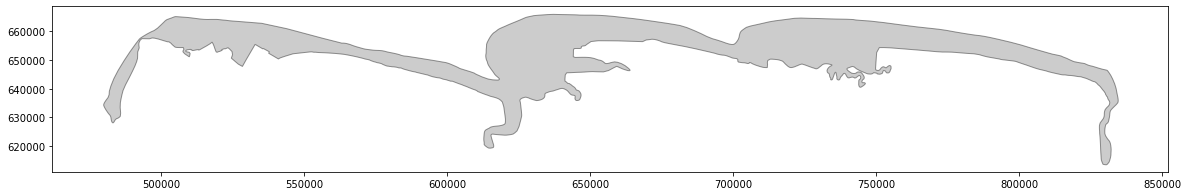

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
ROI.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
AGB_data.plot(ax=ax,color='red')

In [42]:
# Create a list of geodataframe columns to be included as attributes in the output map
vdims = []
for f in AGB_data:
    if f not in ['geometry']:
        vdims.append(f)
vdims

['id_plot', 'BAP', 'id_BAP', 'AGB', 'AGClow']

In [43]:
# Define a function for visualizing GEDI points
def pointVisual(features, vdims):
    return (gvts.EsriImagery * gv.Points(features, vdims=vdims).options(tools=['hover'], height=500, width=900, size=5, 
                                                                        color='yellow', fontsize={'xticks': 10, 'yticks': 10, 
                                                                                                  'xlabel':16, 'ylabel': 16}))

In [21]:
# Call the function for plotting the GEDI points
gv.Polygons(ROI['geometry'].to_crs(epsg='4326')).opts(line_color='red', color=None) * pointVisual(latslons, vdims = vdims)

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Beam,Shot Numbe,Quality Fl,FileLoc)

# GEDI data

## Import GEDI data

In [52]:
gediDF.crs

In [53]:
gediDF= gp.read_file('gediDF_Suriname_total.shp').set_crs(epsg=32621)

In [54]:
#Bekijken van eventuele overlap
gediDF.geometry = gediDF.geometry.buffer(12.5)

In [58]:
overlap = gp.overlay(gediDF,AGB_data, how='intersection')
overlap["area_m2"] = overlap['geometry'].area
print('There are ' + str(len(overlap)) + ' of the current downloaded gedi-shots (partially) overlapping with the field plots.')
overlap["Overlap_percentage"] = (overlap['geometry'].area)/(18*18*np.pi)
overlap.head()

There are 6 of the current downloaded gedi-shots (partially) overlapping with the field plots.


,Unnamed_ 0,Shot Numbe,Beam,Tandem-X D,Elevation,Canopy Ele,Canopy Hei,L2B Qualit,Degrade Fl,Sensitivit,...,Foliage He,fileLoc,id_plot,BAP,id_BAP,AGB,AGClow,geometry,area_m2,Overlap_percentage
0,3431.0,2.836050e+16,BEAM0101,-26.309975,-26.993568,-20.998526,598.0,1.0,0.0,0.963294,...,1.801381,GEDI02_B_2019164113239_O02836_02_T04925_02_003...,3_4,5,3_4_5,7.291821,0.003354,"POLYGON ((549998.855 654995.404, 549998.794 65...",116.971959,0.114918
1,3431.0,2.836050e+16,BEAM0101,-26.309975,-26.993568,-20.998526,598.0,1.0,0.0,0.963294,...,1.801381,GEDI02_B_2019164113239_O02836_02_T04925_02_003...,3_4,5,3_4_5,7.291821,0.003354,"POLYGON ((549998.855 654995.404, 549998.794 65...",116.971959,0.114918
2,5845.0,3.652080e+16,BEAM1000,-17.292477,-30.786711,1.361456,3213.0,1.0,0.0,0.975831,...,3.316915,GEDI02_B_2019217011858_O03652_03_T01030_02_003...,6_3,3,6_3_3,0.925841,0.000426,"POLYGON ((619405.784 639654.308, 619405.724 63...",250.302078,0.245906
3,5845.0,3.652080e+16,BEAM1000,-17.292477,-30.786711,1.361456,3213.0,1.0,0.0,0.975831,...,3.316915,GEDI02_B_2019217011858_O03652_03_T01030_02_003...,6_3,4,6_3_4,13.492252,0.006206,"POLYGON ((619390.000 639666.356, 619390.845 63...",75.818990,0.074487
4,14801.0,6.658110e+16,BEAM1011,-19.262917,-26.233494,-22.711771,351.0,1.0,0.0,0.956950,...,1.524878,GEDI02_B_2020045203739_O06658_03_T00571_02_003...,2_4,3,2_4_3,22.504452,0.010352,"POLYGON ((520010.000 659946.668, 520008.988 65...",114.924666,0.112906


In [63]:
gediDF['Canopy Hei']


0        3001.0
1        3318.0
2        2715.0
3        3509.0
4        3874.0
          ...  
21738     611.0
21739     555.0
21740     578.0
21741     399.0
21742     451.0
Name: Canopy Hei, Length: 21743, dtype: float64

Text(0.5, 1.0, 'DBH')

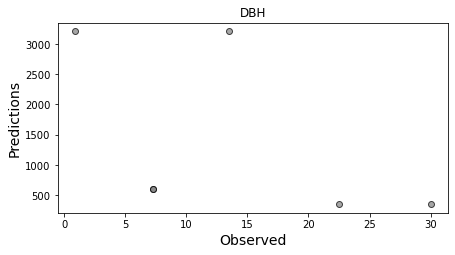

In [62]:
fig, ax = plt.subplots(figsize=(7, 3.5))
ax.scatter(overlap['AGB'], overlap['Canopy Hei'], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Predictions', fontsize=14)
ax.set_xlabel('Observed', fontsize=14)
ax.set_title('DBH')